In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_pickle('Clean_Data/training_data.csv')

df_test = pd.read_pickle('Clean_Data/testing_data.csv')

df_val = pd.read_pickle('Clean_Data/validation_data.csv')

In [3]:
print(df_train.head(3))
print(df_test.head(3))
print(df_val.head(3))

                                               Image   Label
0  [[29, 27, 30, 28, 27, 26, 28, 29, 30, 29, 28, ...  Normal
1  [[107, 58, 53, 47, 50, 81, 84, 83, 97, 93, 106...  Normal
2  [[44, 57, 69, 75, 83, 89, 93, 96, 104, 106, 17...  Normal
                                               Image   Label
0  [[25, 24, 21, 19, 19, 21, 20, 21, 20, 20, 20, ...  Normal
1  [[1, 3, 3, 6, 4, 6, 6, 5, 6, 6, 7, 5, 7, 6, 8,...  Normal
2  [[68, 80, 58, 54, 56, 49, 42, 32, 21, 0, 0, 1,...  Normal
                                               Image   Label
0  [[6, 23, 32, 30, 40, 37, 44, 43, 40, 38, 39, 4...  Normal
1  [[1, 3, 20, 16, 13, 37, 41, 41, 51, 55, 60, 61...  Normal
2  [[2, 104, 88, 98, 105, 117, 117, 126, 122, 126...  Normal


In [4]:
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(5216, 2)
(624, 2)
(16, 2)


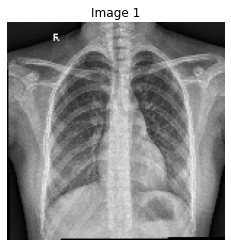

In [5]:
_ = plt.imshow(df_train['Image'][0], cmap='gray')
_ = plt.axis('off')
_ = plt.title('Image 1')